## Human Activity Recognition with Smartphones
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

#### Goal
We'll try to predict wether ther subject is doing one of the following activities:
- STANDING
- SITTING
- LAYING
- WALKING
- WALKING_DOWNSTAIRS
- WALKING_UPSTAIRS

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import datetime as dt
# from datetime import timedelta

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
# #plt.rcParams['figure.figsize'] = (20, 10)

# sns.set(style="whitegrid") # seteando tipo de grid en seaborn

# Change working directory
os.chdir('D:/DS/IOT')

In [2]:
# Load train data
train = pd.read_csv('./data/Human Activity/train.csv')
test = pd.read_csv('./data/Human Activity/test.csv')

## Data Exploration

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# Combine boths dataframes
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)

#### Columns in dataset
561 columns containing accelerometer an gyroscope data, for 30 subjects. 21 in train set and 9 in test set.

In [5]:
print(train['subject'].nunique())
print(test['subject'].nunique())
# print(train['subject'].value_counts())
print(len(train.columns.values))
print(train.columns.values)

21
9
564
['tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X' 'tBodyAcc-max()-Y' 'tBodyAcc-max()-Z'
 'tBodyAcc-min()-X' 'tBodyAcc-min()-Y' 'tBodyAcc-min()-Z' 'tBodyAcc-sma()'
 'tBodyAcc-energy()-X' 'tBodyAcc-energy()-Y' 'tBodyAcc-energy()-Z'
 'tBodyAcc-iqr()-X' 'tBodyAcc-iqr()-Y' 'tBodyAcc-iqr()-Z'
 'tBodyAcc-entropy()-X' 'tBodyAcc-entropy()-Y' 'tBodyAcc-entropy()-Z'
 'tBodyAcc-arCoeff()-X,1' 'tBodyAcc-arCoeff()-X,2'
 'tBodyAcc-arCoeff()-X,3' 'tBodyAcc-arCoeff()-X,4'
 'tBodyAcc-arCoeff()-Y,1' 'tBodyAcc-arCoeff()-Y,2'
 'tBodyAcc-arCoeff()-Y,3' 'tBodyAcc-arCoeff()-Y,4'
 'tBodyAcc-arCoeff()-Z,1' 'tBodyAcc-arCoeff()-Z,2'
 'tBodyAcc-arCoeff()-Z,3' 'tBodyAcc-arCoeff()-Z,4'
 'tBodyAcc-correlation()-X,Y' 'tBodyAcc-correlation()-X,Z'
 'tBodyAcc-correlation()-Y,Z' 'tGravityAcc-mean()-X'
 'tGravityAcc-mean()-Y' 'tGravityAcc-mean()-Z' 'tGravityAcc-std()-X'

In [6]:
# np.char.split(pd.to_DataFrame(train.columns.values), '-')
# names = pd.DataFrame(train.columns.values, columns=['Names'])
# names['Names'].str.split('-').str[0].value_counts()

#### Missing values, max, min
- Features are normalized and bounded within [-1,1].

In [7]:
print('Max value:', both.iloc[:,0:561].max().max())
print('Min value:', both.iloc[:,0:561].min().min())
print('Missing values:', both.isnull().sum().sum())

Max value: 1.0
Min value: -1.0
Missing values: 0


#### Frequency of each activity

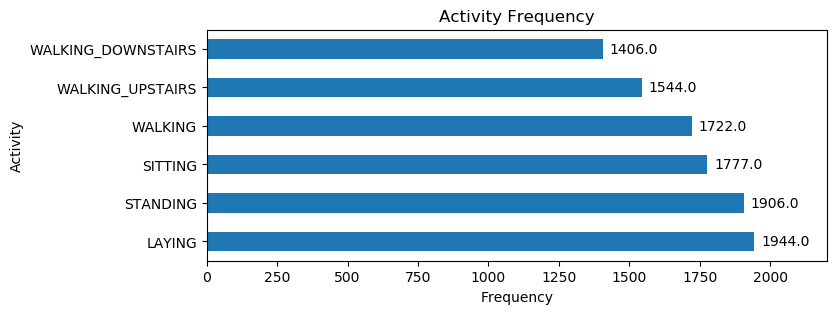

In [8]:
# Plot the figure.
plt.figure(figsize=(8, 3))
ax = both['Activity'].value_counts().plot.barh()
ax.set_title('Activity Frequency')
ax.set_xlabel('Frequency')
ax.set_ylabel('Activity')
# ax.set_yticklabels(y_labels)
ax.set_xlim(0, 2200) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
        
plt.show()

### Are the classes separable?

##### What is t-SNE?
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

In [9]:
label = both.Activity

In [10]:
# Scale data
scl = StandardScaler()
sboth = scl.fit_transform(both.iloc[:,1:561])

In [11]:
# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
pca_both = pca.fit_transform(sboth)

In [12]:
%%time
# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(pca_both)

Wall time: 2min 20s


In [13]:
(label.value_counts().index)

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [14]:
pca_both

array([[-1.63810473e+01,  1.99361501e+00,  3.41401754e+00, ...,
         5.40855054e-01, -8.74837152e-01, -2.20130232e+00],
       [-1.55821948e+01,  1.18126631e+00, -3.03552223e-01, ...,
         3.51496084e-01, -4.82825415e-01, -4.39400908e-01],
       [-1.54240185e+01,  2.24093447e+00, -1.21164536e+00, ...,
        -1.67092391e+00, -7.91266165e-01,  2.01305787e-01],
       ...,
       [ 1.18464956e+01, -3.45267409e+00,  2.24763890e+00, ...,
        -2.76306851e-01, -1.34026223e+00, -7.23350553e-01],
       [ 8.20686468e+00, -4.37822145e+00,  1.32993890e+00, ...,
         9.12834478e-03, -1.39586114e+00,  8.77576668e-01],
       [ 9.31175107e+00, -3.95680587e+00,  1.91038977e+00, ...,
        -2.56427490e-01, -1.75601993e+00,  3.71945880e-01]])

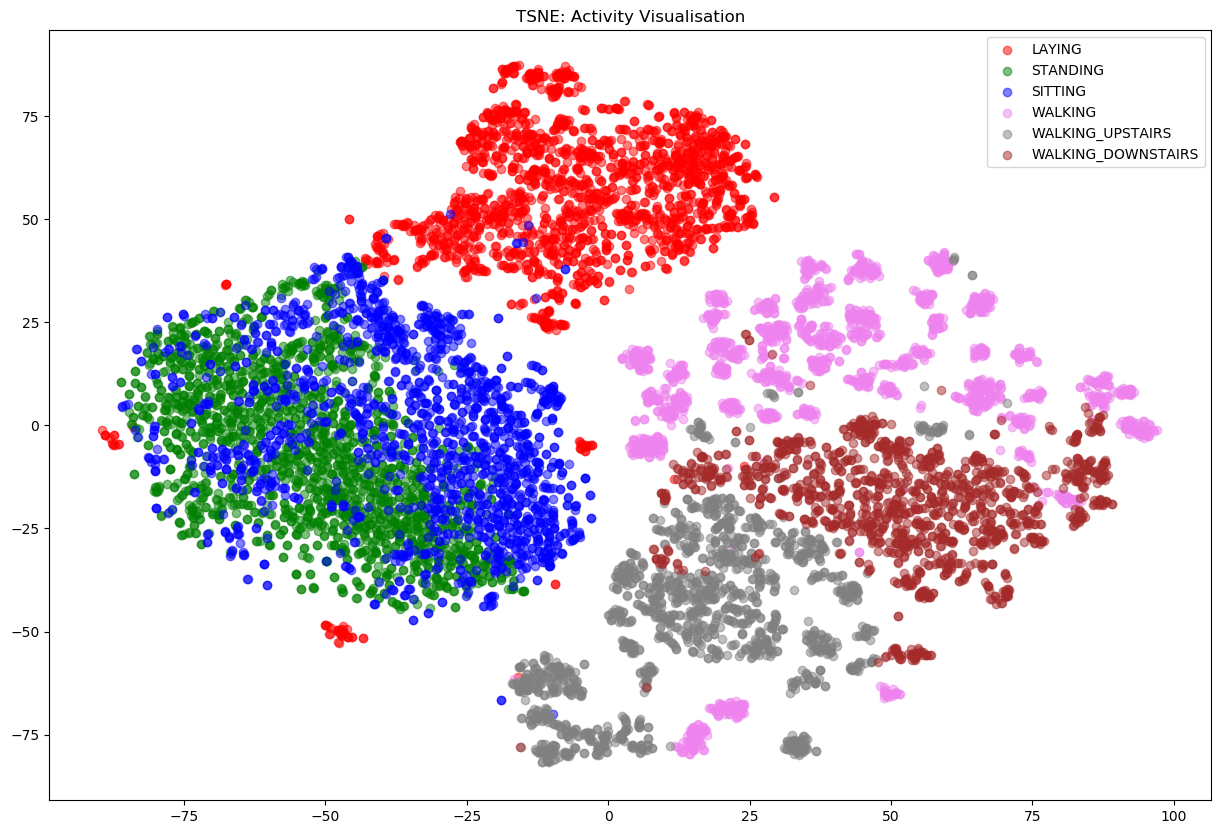

In [15]:
# Create subplots
fig = plt.figure( figsize=(15,10))
axarr = fig.add_subplot(1, 1, 1)

colors = ['red','green','blue','violet','grey','brown']#[rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label.value_counts().index):
    mask = (label==group).values
    axarr.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr.set_title('TSNE: Activity Visualisation')
axarr.legend()
plt.show()

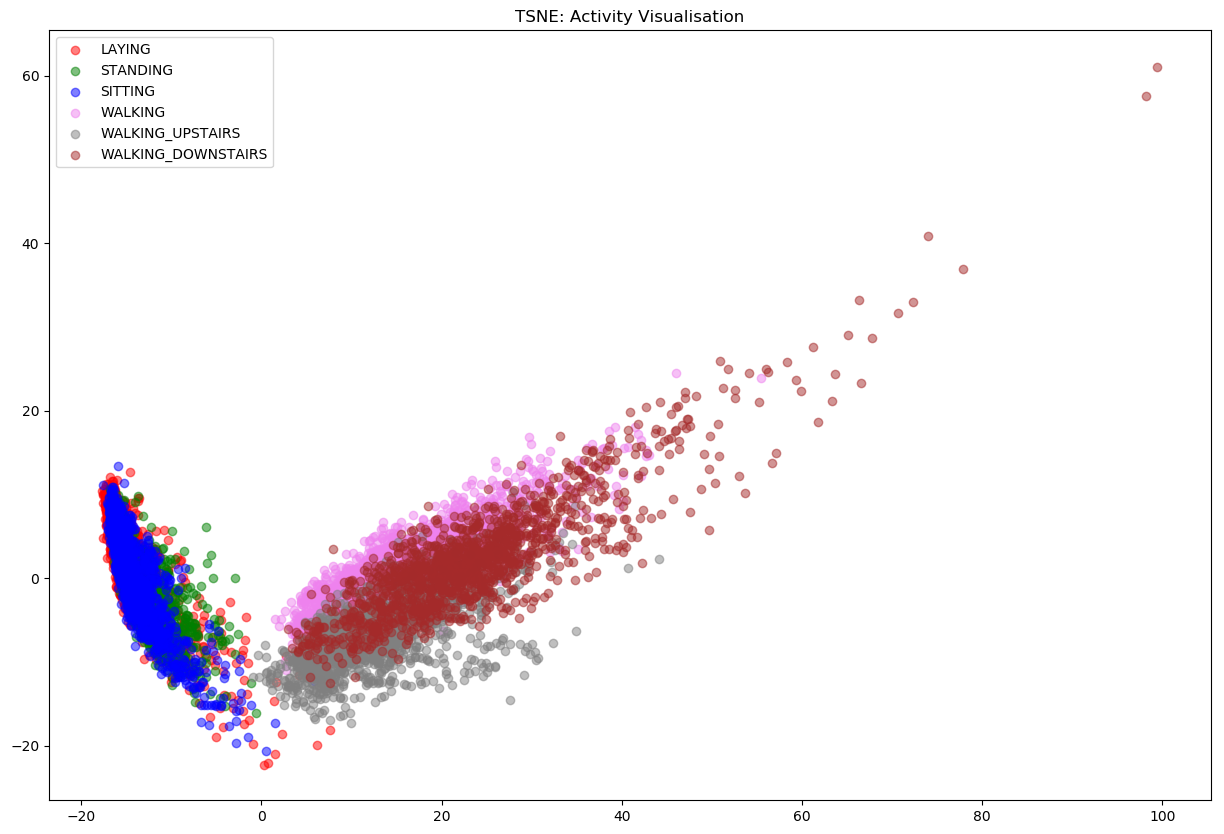

In [16]:
# Create subplots
fig = plt.figure( figsize=(15,10))
axarr = fig.add_subplot(1, 1, 1)

colors = ['red','green','blue','violet','grey','brown']#[rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label.value_counts().index):
    mask = (label==group).values
    axarr.scatter(x=pca_both[mask][:,0], y=pca_both[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr.set_title('TSNE: Activity Visualisation')
axarr.legend()
plt.show()

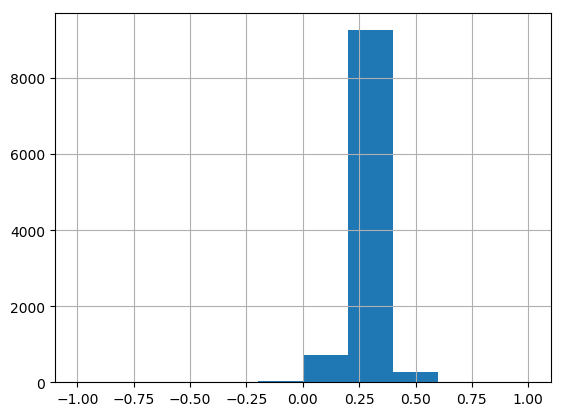

In [17]:
both['tBodyAcc-mean()-X'].hist()